![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.4.1


## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

In [ ]:
import cv2
no_mobile_path =  "/content/drive/MyDrive/mobile-images/no-mobile"
yes_mobile_path =  "/content/drive/MyDrive/mobile-images/yes-mobile"
print("No mobile images :" , len(os.listdir(no_mobile_path)))
print("Yes mobile images :", len(os.listdir(yes_mobile_path)))

No mobile images : 121
Yes mobile images : 124


### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [ ]:
yes_mobile = os.listdir(yes_mobile_path)

x_yes = []
y_yes = []

for i in yes_mobile:
  img = cv2.imread(os.path.join(yes_mobile_path, i))
  img = cv2.resize(img,(128,128))
  x_yes.append(img)
  y_yes.append(1)

In [ ]:
no_mobile = os.listdir(no_mobile_path)

x_no = []
y_no = []

for i in no_mobile:
  img = cv2.imread(os.path.join(no_mobile_path, i))
  img = cv2.resize(img,(128,128))
  x_no.append(img)
  y_no.append(0)

### Check shape and size of the images

In [ ]:
print(x_yes[0].shape)
print(x_no[0].shape)
print(y_yes[0])
print(y_no[0])

(128, 128, 3)
(128, 128, 3)
1
0


###  What is the percentage of images with and without mobile phone in the data

In [ ]:
len(os.listdir(no_mobile_path)) / (len(os.listdir(no_mobile_path)) + len(os.listdir(yes_mobile_path)))

0.49387755102040815

In [ ]:
len(os.listdir(yes_mobile_path)) / (len(os.listdir(no_mobile_path)) + len(os.listdir(yes_mobile_path)))

0.5061224489795918

### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [ ]:
X = np.concatenate((x_yes, x_no), axis = 0)
Y = np.concatenate((y_yes, y_no), axis = 0)

print(X.shape)
print(Y.shape)

(245, 128, 128, 3)
(245,)


### Shuffle the above data and labels ( Data and label should be in sync)

In [ ]:
from sklearn.utils import shuffle

X, Y = shuffle(X, Y, random_state=0)

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

This is: 0


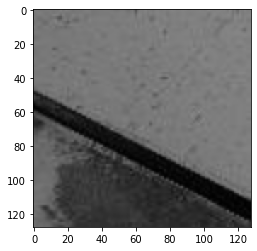

This is: 1


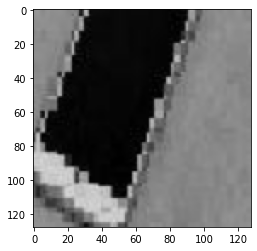

This is: 1


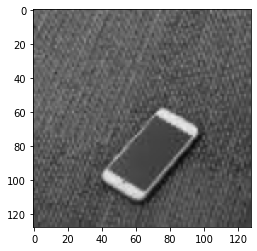

This is: 0


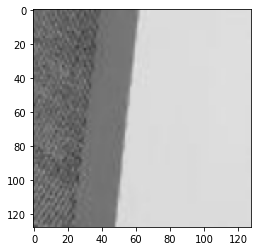

This is: 0


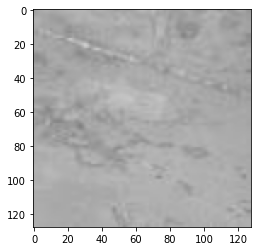

This is: 1


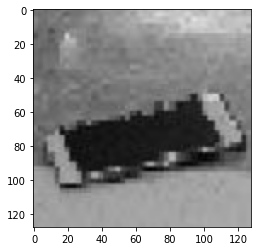

This is: 0


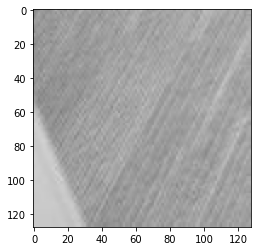

This is: 1


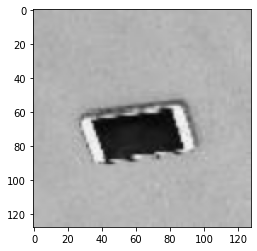

This is: 0


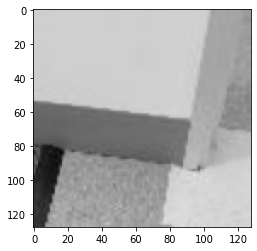

This is: 1


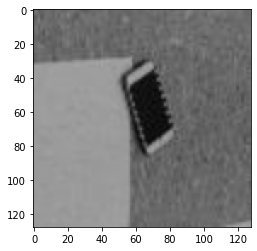

In [ ]:
for i in range(10):
  label = Y[i]
  img = X[i]
  print('This is:',label)
  plt.imshow(img);
  plt.show()

### Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Print shape of the X train and X test data

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(171, 128, 128, 3) (74, 128, 128, 3)
(171,) (74,)


### Normalize the data by dividing by 255

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train)
print(X_test)

[[[[0.5294118  0.5294118  0.5294118 ]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5254902  0.5254902  0.5254902 ]
   ...
   [0.56078434 0.56078434 0.56078434]
   [0.5647059  0.5647059  0.5647059 ]
   [0.5647059  0.5647059  0.5647059 ]]

  [[0.52156866 0.52156866 0.52156866]
   [0.5176471  0.5176471  0.5176471 ]
   [0.5176471  0.5176471  0.5176471 ]
   ...
   [0.5647059  0.5647059  0.5647059 ]
   [0.5686275  0.5686275  0.5686275 ]
   [0.5686275  0.5686275  0.5686275 ]]

  [[0.50980395 0.50980395 0.50980395]
   [0.50980395 0.50980395 0.50980395]
   [0.50980395 0.50980395 0.50980395]
   ...
   [0.5647059  0.5647059  0.5647059 ]
   [0.5686275  0.5686275  0.5686275 ]
   [0.5686275  0.5686275  0.5686275 ]]

  ...

  [[0.4627451  0.4627451  0.4627451 ]
   [0.4745098  0.4745098  0.4745098 ]
   [0.4862745  0.4862745  0.4862745 ]
   ...
   [0.58431375 0.58431375 0.58431375]
   [0.58431375 0.58431375 0.58431375]
   [0.58431375 0.58431375 0.58431375]]

  [[0.6862745  0.6862745  0.6862745 ]
   [0.6

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [ ]:
import tensorflow as tf
import keras
trainY = tf.keras.utils.to_categorical(y_train, num_classes=2)
testY = tf.keras.utils.to_categorical(y_test, num_classes=2)

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [ ]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


row ,col = 128,128
channel = 3
n_classes = 2
n_epochs = 50
batch_size = 32


model = Sequential()
model.add(Conv2D(32, kernel_size = 3 , activation= 'relu', input_shape = (row,col,channel)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size = 3 , activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(n_classes , activation= 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 115202    
Total params: 134,594
Trainable params: 134,594
Non-trainable params: 0
________________________________________________

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [ ]:
training_history = model.fit(X_train, trainY, validation_data= (X_test, testY), epochs= n_epochs, batch_size= batch_size)

Epoch 1/50
6/6 [==============================] - 1s 53ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.9024 - val_accuracy: 0.8649
Epoch 2/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0127 - accuracy: 0.9926 - val_loss: 0.7606 - val_accuracy: 0.8784
Epoch 3/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0569 - accuracy: 0.9763 - val_loss: 0.7730 - val_accuracy: 0.8784
Epoch 4/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0143 - accuracy: 0.9948 - val_loss: 0.5496 - val_accuracy: 0.9189
Epoch 5/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.4973 - val_accuracy: 0.9189
Epoch 6/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6166 - val_accuracy: 0.8919
Epoch 7/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.7564 - val_accuracy: 0.8784
Epoch 8/50
6/6 [===========

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [ ]:
metric = model.evaluate(X_test, testY)
print("Loss :", metric[0])
print("Accuracy :", metric[1])

3/3 [==============================] - 0s 6ms/step - loss: 0.7471 - accuracy: 0.9054
Loss : 0.7471449375152588
Accuracy : 0.9054054021835327


### Predict label data of the test data and check confusion matrix

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, 1)

from sklearn.metrics import confusion_matrix , classification_report
print(confusion_matrix(np.argmax(testY,1), y_pred))

print("-" * 100)
print(classification_report(np.argmax(testY,1), y_pred))

[[33  3]
 [ 4 34]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.92      0.89      0.91        38

    accuracy                           0.91        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.91      0.91      0.91        74



### Display test images and their predicted label for a few samples

This is 0 and predited label is 1


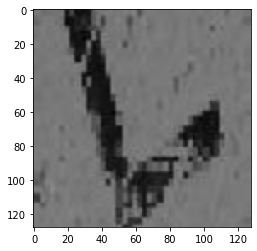

This is 0 and predited label is 0


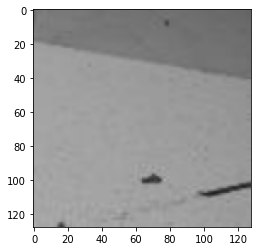

This is 0 and predited label is 1


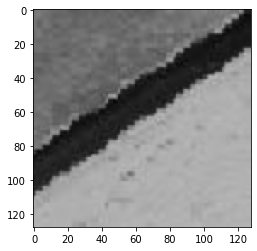

This is 1 and predited label is 1


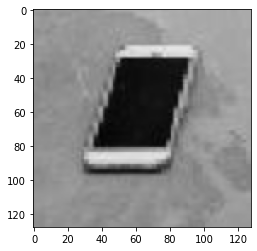

This is 1 and predited label is 1


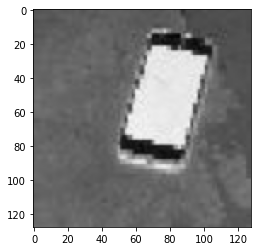

In [ ]:
for i in range(5):
  label = y_pred[i]
  actual = y_test[i]
  img = X_test[i]
  print('This is {} and predited label is {}' .format(actual,label))
  plt.imshow(img);
  plt.show()

This is 0 and predited label is 1


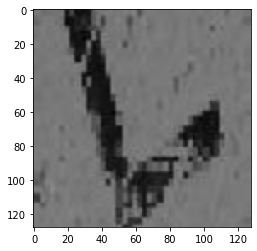

This is 0 and predited label is 1


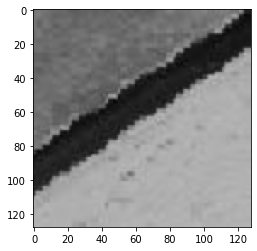

This is 1 and predited label is 0


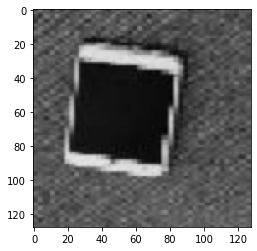

This is 0 and predited label is 1


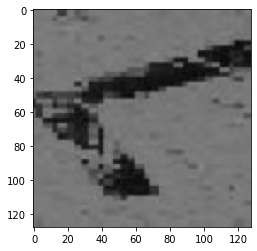

This is 1 and predited label is 0


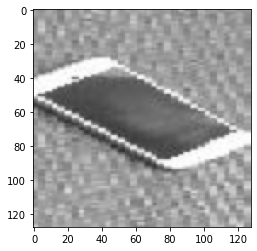

This is 1 and predited label is 0


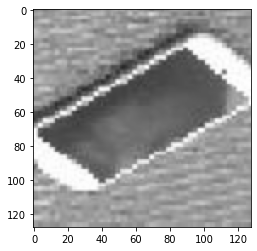

This is 1 and predited label is 0


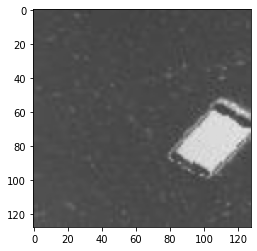

In [ ]:
for i in range(X_test.shape[0]):
  label = y_pred[i]
  actual = y_test[i]
  if label != actual:
    img = X_test[i]
    print('This is {} and predited label is {}' .format(actual,label) )
    plt.imshow(img);
    plt.show()

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

In [ ]:
training_accuracy = training_history.history['accuracy']
validation_accuracy = training_history.history['val_accuracy']
training_loss = training_history.history['loss']
validation_loss = training_history.history['val_loss']

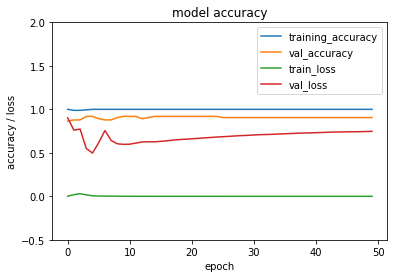

In [ ]:
fig, axs = plt.subplots()
axs.set_ylim([-0.5,2])
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'val_accuracy', 'train_loss','val_loss'], loc='best')
plt.show()

## 7.  Conclusion and Interpretation

### Write your observations and findings